<a href="https://colab.research.google.com/github/pavaniParjapnoar11/DRDO_assignment/blob/main/Hospital_Re-admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [62]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation & Exploration


1. **encounter_id:** A unique identifier assigned to each encounter or interaction with the healthcare system. It distinguishes different instances of patient care and is crucial for tracking and linking specific events.

2. **patient_nbr:** An identifier assigned to each patient, allowing for the linkage of multiple encounters to the same individual.

3. **race:** Represents the racial background of the patient, categorized into groups such as White, Black, Asian, etc.
4. **gender:** Indicates the gender of the patient, typically recorded as 'Male' or 'Female.'

5. **age:** Represents the age of the patient at the time of the encounter.

6. **admission_type_id:** Represents the type of admission to the hospital (e.g., emergency, elective, urgent)..

7. **discharge_disposition_id:** Represents the type of discharge after the hospital stay (e.g., discharged to home, transferred to another facility).

8. **admission_source_id:** Represents the source of the patient's admission (e.g., emergency room, referral).

9. **time_in_hospital:** Indicates the number of days the patient spent in the hospital during the specific encounter.

10. **num_lab_procedures:** Represents the number of lab procedures performed during the encounter. Includes various medical tests and diagnostics.
Certainly, let's delve into the remaining columns:

11. **nummed:**Represent the number of medications.

12. **num_medications|time_in_hospital:** Combination of two features, possibly indicating the number of medications in relation to the time spent in the hospital.
13. **num_medications|num_procedures:** Relationship between the number of medications and the number of procedures performed during the encounter.

14. **time_in_hospital|num_lab_procedures:** Interaction between the time spent in the hospital and the number of lab procedures conducted during the encounter.

15. **num_medications|num_lab_procedures:** This column signify relationship between the number of medications and the number of lab procedures.

16. **num_medications|number_diagnoses:** Represent the interaction between the number of medications and the number of diagnoses recorded during the encounter.

17. **age|number_diagnoses:** Interaction between the patient's age and the number of diagnoses made during the encounter.

18. **change|num_medications:** Relationship between a change (possibly a change in medication) and the number of medications.

19. **number_diagnoses|time_in_hospital:**  Number of diagnoses and the time spent in the hospital.

20. **num_medications|numchange:** Number of medications and a change in some variable.




In [63]:
#loading Dataset
df = pd.read_csv("/content/diabetic_data.csv")

In [182]:
#displaying first 10 rows of data
df.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,nummed,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,54,0,177,1062,162,135,18,27,18
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,1,26,65,22,143,78,150,0,12,0
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,1,32,16,88,704,112,245,16,14,16
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,2,8,0,51,408,40,225,8,5,0
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,1,48,96,93,496,144,495,0,27,0
6,55842,84259809,Caucasian,1,65,3,1,1,4,70,...,3,84,21,280,1470,147,455,21,28,0
7,63768,114882984,Caucasian,1,75,1,1,7,5,73,...,1,60,0,365,876,96,600,0,40,0
8,12522,48330783,Caucasian,0,85,1,1,4,13,68,...,2,364,56,884,1904,224,680,28,104,0
9,15738,63555939,Caucasian,0,95,3,2,4,12,33,...,2,216,54,396,594,144,760,18,96,0
10,28236,89869032,AfricanAmerican,0,45,1,1,7,9,47,...,1,153,34,423,799,153,405,0,81,0


In [65]:
#checking shape of the dataset
df.shape

(101766, 50)

In [66]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#Checking for missing values in dataset
In the dataset missing values are represented as '?' sign

In [176]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_diagnoses 0
max_glu_serum 0
numchange 0
level1_diag1 0
nummed 0
num_medications|time_in_hospital 0
num_medications|num_procedures 0
time_in_hospital|num_lab_procedures 0
num_medications|num_lab_procedures 0
num_medications|number_diagnoses 0
age|number_diagnoses 0
change|num_medications 0
number_diagnoses|time_in_hospital 0
num_medications|numchange 0


In [68]:
# gender was coded differently so we use a custom count for this one
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


#Dealing With Missing Values

Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values so we decided to drop these variables. Variable Payer code and medical specialty contains approximate 40% missing values so we also dropped these variables. Variables race, diag_1, diag_2, diag_3 and gender contains very less missing values as compared to other attributes which we dropped so for these attributes we also decided to drop those where missing values contains.



In [69]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [70]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [71]:
df = df.drop(['citoglipton', 'examide'], axis = 1)


variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables



In [72]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


#Feature Extraction

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.

In [73]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [74]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [75]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [76]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [77]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [78]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()


8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

Collapsing of Multiple Encounters for same patient Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
Considering average stay at hospital across multiple encounters.
Considering the percentage of the medication changes across multiple encounters
Considering the total number of the encounters to replace the encounter unique ID
Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, for instance, we did not find it not meaningful to combine multiple categorical values into an array for building data model. We then considered first encounter and last encounter separately as possible representations of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 70,000 encounters:

In [79]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [80]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [81]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [82]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

Categorization of Diagnosis:Organizing a dataset that had complex medical diagnosis codes into more manageable and interpretable categories. Each patient could have up to three diagnoses, and each diagnosis had hundreds of unique codes. To simplify the data, we grouped these codes into 9 broader disease categories, such as Circulatory, Respiratory, Digestive, etc. We initially considered all three diagnoses but decided to focus only on the primary diagnosis for our model. The challenge was mapping the specific disease codes to their corresponding category names in Python, and the provided code demonstrates how we accomplished this task.

In [83]:
# Creating additional columns for diagnosis# Creati
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [84]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)


In [85]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [86]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0


In [87]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

#Datavisualization

Distribution of Readmission:
Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

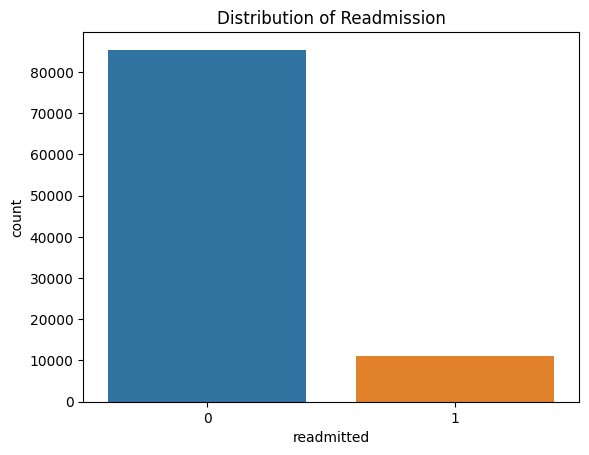

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'readmitted' column
sns.countplot(data=df, x='readmitted').set_title('Distribution of Readmission')
plt.show()

#Time in Hospital and Readmission

<ipython-input-88-13feb082618e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-88-13feb082618e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

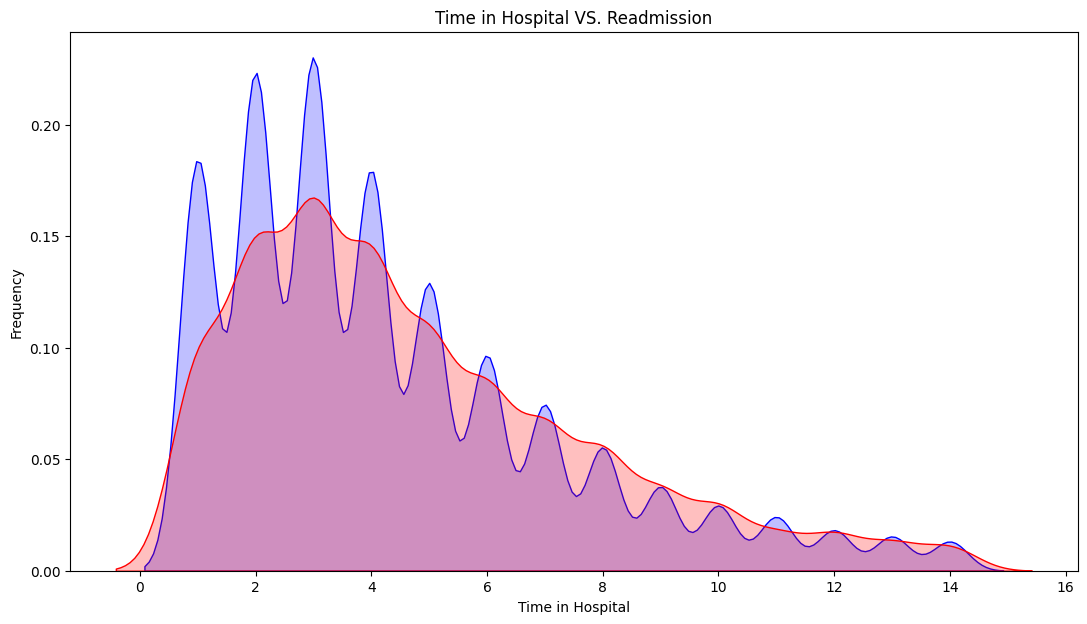

In [88]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

#Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

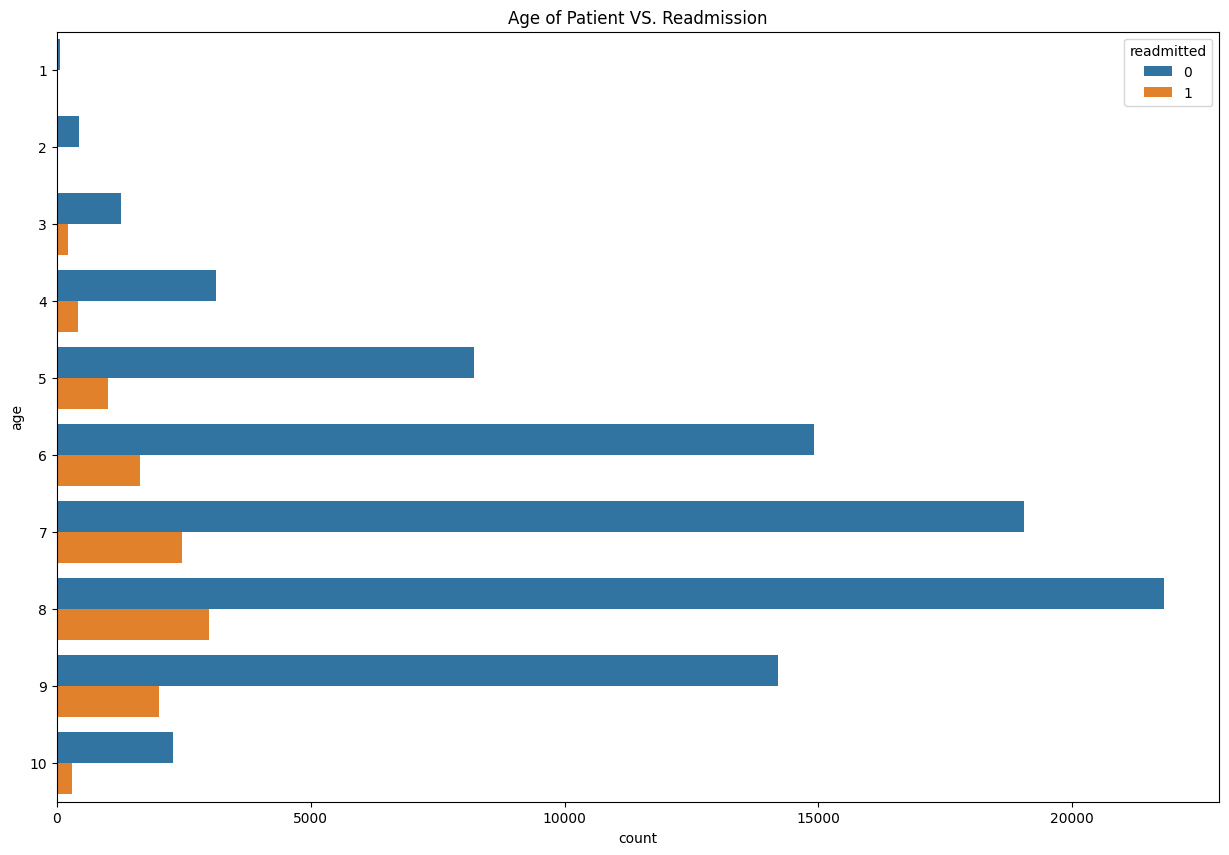

In [89]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

Ethnicity of Patient and Readmission

<Axes: xlabel='count', ylabel='race'>

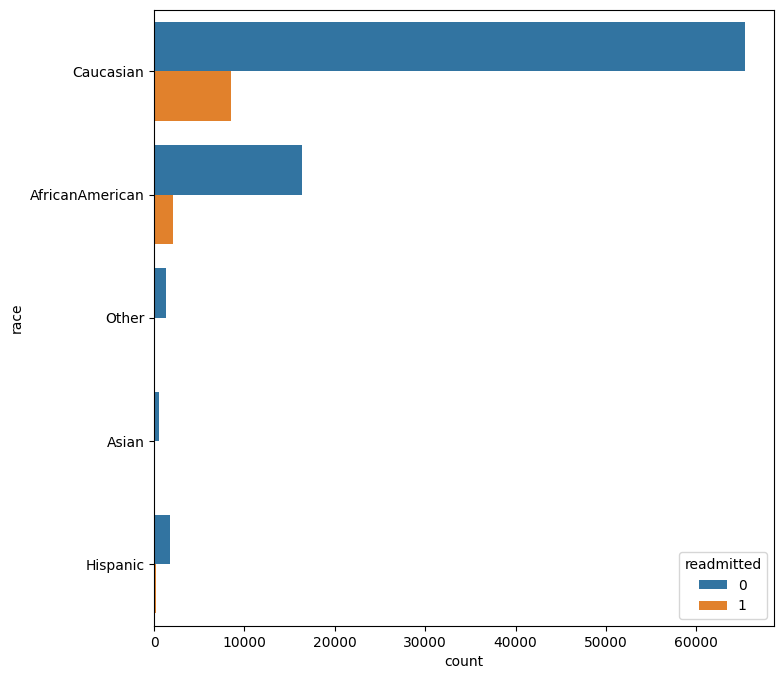

In [90]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Number of medications used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

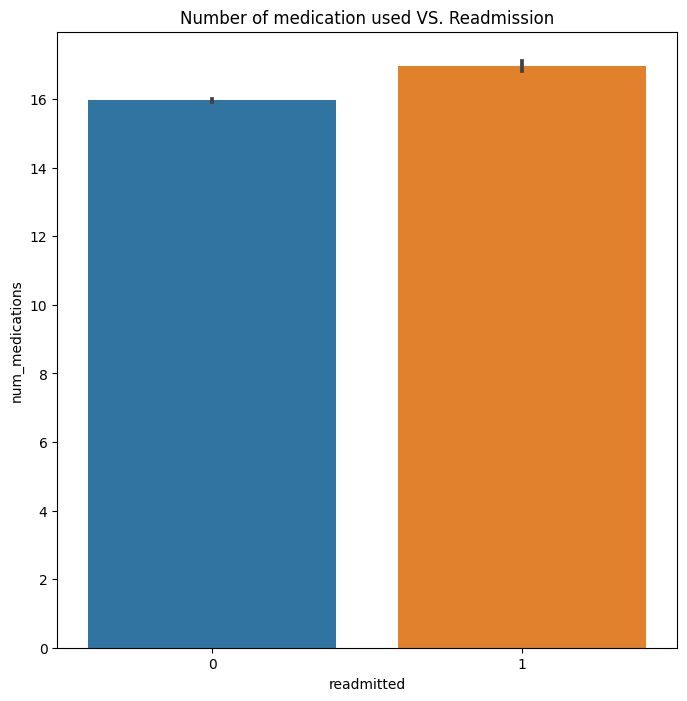

In [91]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

Gender and Readmission
male-1;
female-0.

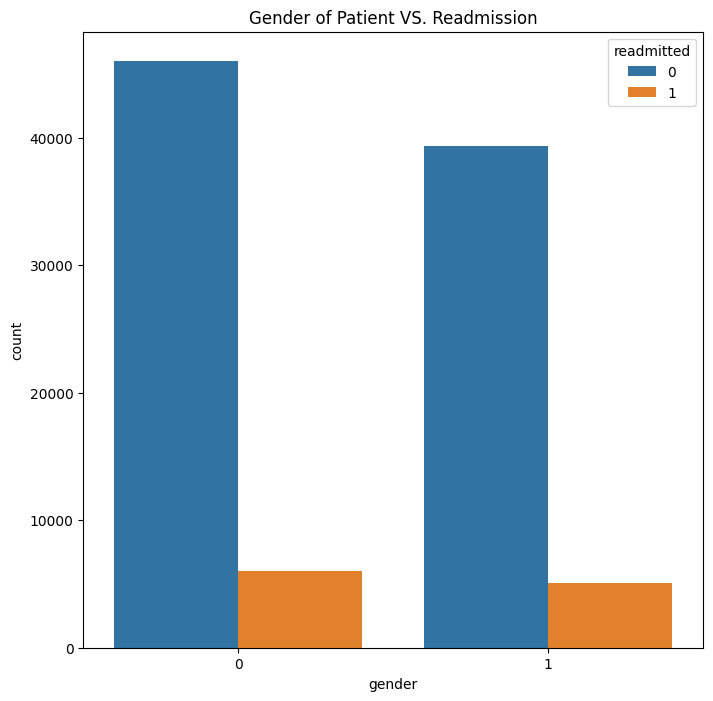

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'gender' and 'readmitted' columns
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='gender', hue='readmitted', data=df).set_title("Gender of Patient VS. Readmission")
plt.show()


Change of medication vs Readmission

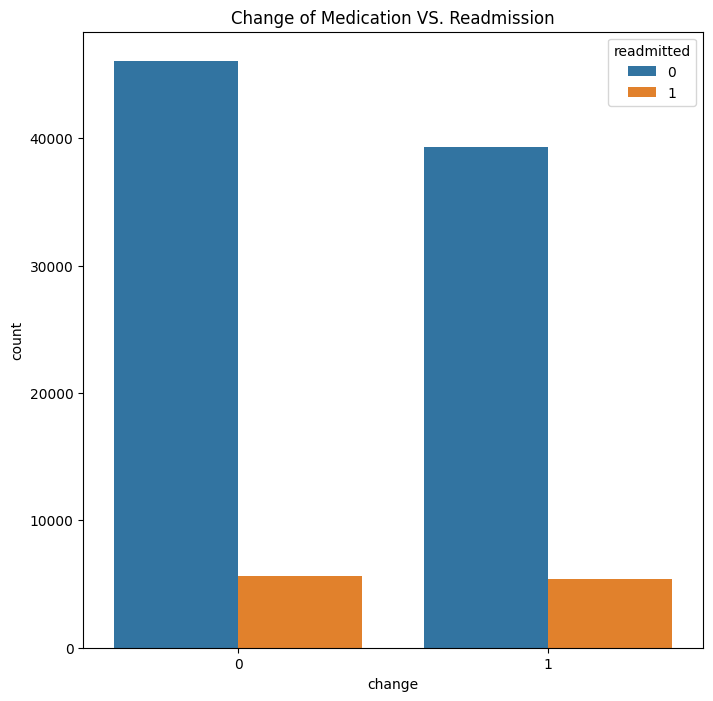

In [94]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='change', hue='readmitted', data=df).set_title("Change of Medication VS. Readmission")
plt.show()

Diabetes Medication prescribed and Readmission
Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
Values: “yes” : 1 “no” : 0

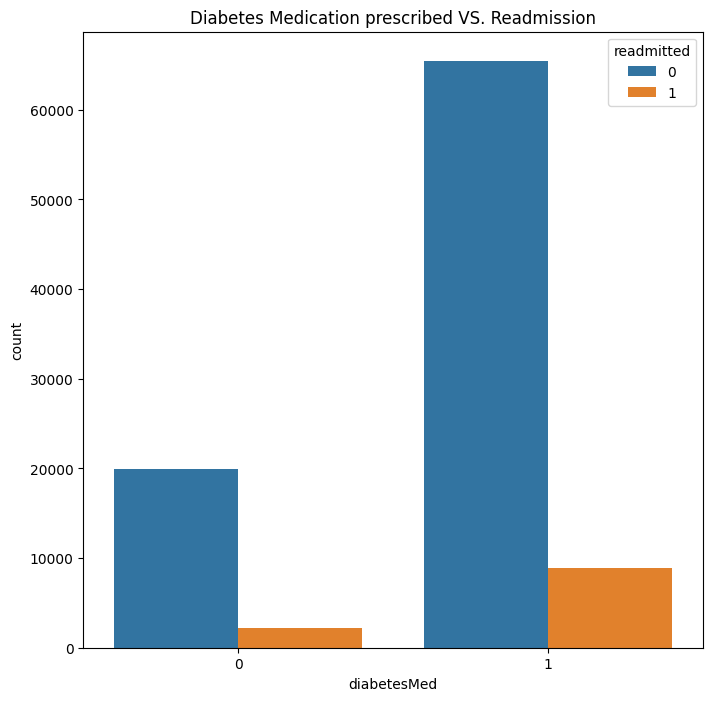

In [95]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='diabetesMed', hue='readmitted', data=df).set_title("Diabetes Medication prescribed VS. Readmission")
plt.show()

Service Utilization and Readmission¶


Text(0.5, 1.0, 'Service Utilization VS. Readmission')

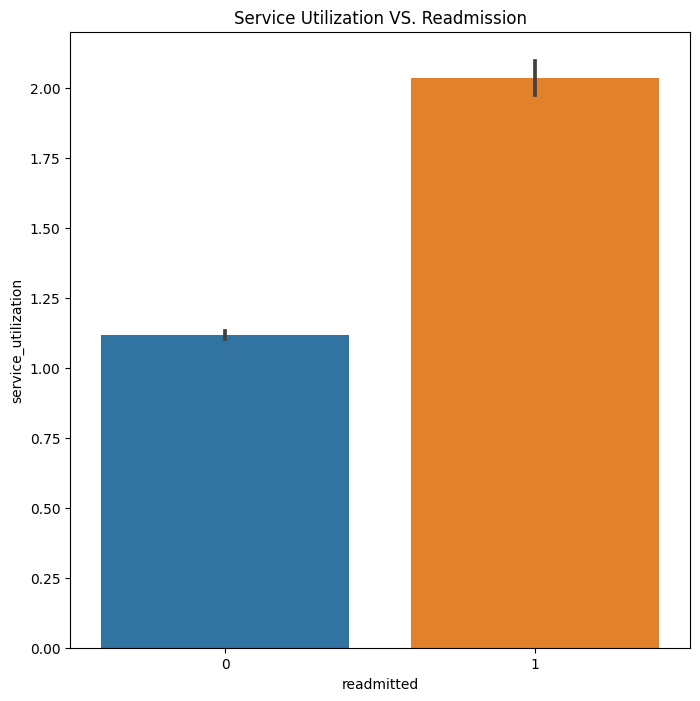

In [109]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

Glucose serum test result and Readmission
Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

'>200' : 1 = indicates diabetes
'>300' : 1 = Indicates diabetes
'Norm' : 0 = Normal
'None' : -99 = test was not taken


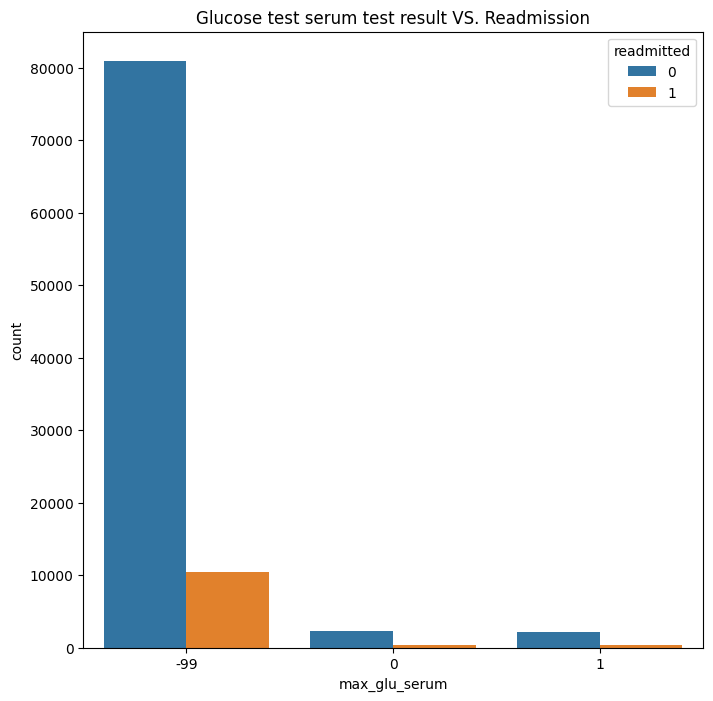

In [97]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df).set_title("Glucose test serum test result VS. Readmission")
plt.show()

A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.

'>7' : 1
'>8' : 1
Norm : 0 = Normal
None : -99 = Test was not taken

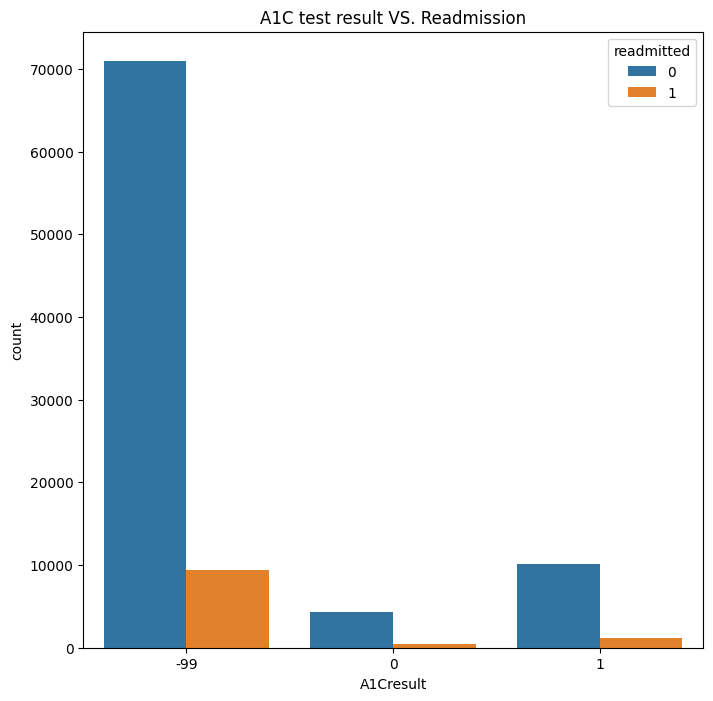

In [98]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='A1Cresult', hue='readmitted', data=df).set_title("A1C test result VS. Readmission")
plt.show()

Number of lab procedure and Readmission


<ipython-input-99-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-99-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

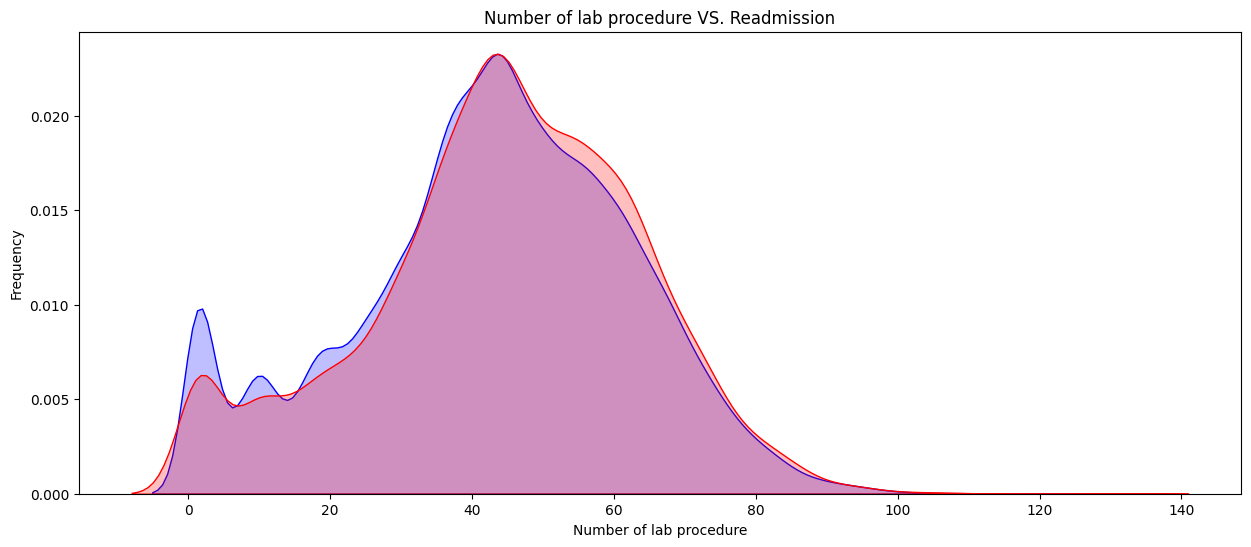

In [99]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

#Pre-Modelling Data Preprocesssing

Pre-Modeling Data Preprocessing
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that information by treating it as a simple categorical variable

In [100]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


In [101]:
df = df.astype('object')

In [111]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'numchange', 'level1_diag1', 'level2_diag1',
       'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3',
       'nummed'],
      

In [112]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age',  'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [113]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital            object
num_lab_procedures          object
num_procedures              object
num_medications             object
number_outpatient           object
number_emergency            object
number_inpatient            object
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

Number of medication used: Another possibly related factor could be the total number of medications used by the patient (which may indicate severity of their condition and/or the intensity of care). So we created another feature by counting the medications used during the encounter (keys variable in code below is continued from above):

In [114]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [115]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

[]

In [116]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [117]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after


In [118]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [119]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [120]:
df.shape

(96446, 50)

In [121]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

[]

In [122]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital            object
num_lab_procedures          object
num_procedures              object
num_medications             object
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            object
max_glu_serum               object
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone       

In [123]:
dfcopy = df.copy(deep = True)


In [124]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [125]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [126]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [127]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [128]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [129]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [130]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 51)

In [131]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [132]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

In [133]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

<ipython-input-133-e0e8b8383330>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
A1Cresult,1.000000,0.044596,0.019199,0.001280,-0.002745,0.020104,-0.001803,0.012998,0.006773,-0.002193,0.002927,0.009386,0.004377,0.000915,-0.003123,-0.001972,0.100942,-0.002061,0.002818,nan,nan,-0.001803,0.100212,0.074936,-0.007271
metformin,0.044596,1.000000,0.006395,0.014350,-0.011891,0.038733,-0.001995,0.076543,0.144122,-0.007981,0.057996,0.094459,0.012103,0.014232,-0.003455,-0.001662,-0.020139,-0.025471,-0.001720,nan,nan,0.007418,0.350803,0.291990,-0.012733
repaglinide,0.019199,0.006395,1.000000,-0.000777,-0.003706,-0.006820,-0.000449,-0.019741,-0.022431,-0.001797,0.019681,0.017064,0.020145,0.020395,-0.000778,-0.002377,0.009504,-0.005119,-0.001188,nan,nan,-0.000449,0.076877,0.065744,0.014117
nateglinide,0.001280,0.014350,-0.000777,1.000000,-0.002695,0.008264,-0.000327,-0.016002,-0.021061,-0.001307,0.029576,0.014483,0.002003,0.018943,-0.000566,-0.001729,0.001591,-0.002872,-0.000864,nan,nan,-0.000327,0.056656,0.047821,-0.003602
chlorpropamide,-0.002745,-0.011891,-0.003706,-0.002695,1.000000,-0.007482,-0.000122,-0.010842,-0.006752,-0.000488,-0.007296,-0.001026,-0.001703,-0.000546,-0.000211,-0.000646,-0.018192,-0.002653,-0.000323,nan,nan,-0.000122,-0.006141,0.017869,-0.005147
glimepiride,0.020104,0.038733,-0.006820,0.008264,-0.007482,1.000000,-0.000907,-0.075660,-0.074201,-0.003628,0.048856,0.036059,0.012119,0.015204,0.008374,-0.004800,0.007490,-0.010130,-0.002399,nan,nan,-0.000907,0.144632,0.132733,-0.003157
acetohexamide,-0.001803,-0.001995,-0.000449,-0.000327,-0.000122,-0.000907,1.000000,-0.001483,-0.001359,-0.000059,-0.001099,-0.001030,-0.000206,-0.000066,-0.000026,-0.000078,0.003792,-0.000322,-0.000039,nan,nan,-0.000015,0.004260,0.002166,-0.001215
glipizide,0.012998,0.076543,-0.019741,-0.016002,-0.010842,-0.075660,-0.001483,1.000000,-0.113825,-0.005931,0.042896,0.039576,0.021352,0.001059,-0.002568,-0.005680,-0.021353,-0.028503,-0.003923,nan,nan,-0.001483,0.212017,0.217014,0.010174
glyburide,0.006773,0.144122,-0.022431,-0.021061,-0.006752,-0.074201,-0.001359,-0.113825,1.000000,-0.002373,0.023496,0.032147,0.019796,0.002140,-0.002354,-0.007192,-0.066837,-0.009665,0.001035,nan,nan,-0.001359,0.199818,0.198888,0.004935
tolbutamide,-0.002193,-0.007981,-0.001797,-0.001307,-0.000488,-0.003628,-0.000059,-0.005931,-0.002373,1.000000,-0.004395,-0.004120,-0.000826,-0.000265,-0.000103,-0.000313,-0.007916,-0.001286,-0.000157,nan,nan,-0.000059,-0.004229,0.008664,-0.001511


In [134]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

<ipython-input-134-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-134-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-134-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-134-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype

In [135]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [136]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['patient_nbr',
 'diabetesMed',
 'glipizide',
 'troglitazone',
 'metformin',
 'metformin-rosiglitazone',
 'nateglinide',
 'pioglitazone',
 'A1Cresult',
 'chlorpropamide',
 'glipizide-metformin',
 'repaglinide',
 'miglitol',
 'tolbutamide',
 'glimepiride-pioglitazone',
 'insulin',
 'encounter_id',
 'glimepiride',
 'tolazamide',
 'glyburide-metformin',
 'acetohexamide',
 'rosiglitazone',
 'glyburide',
 'acarbose',
 'metformin-pioglitazone']

In [137]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [138]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [139]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [140]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
...,...,...,...,...,...
AfricanAmerican,0,1,0,0,0
Asian,0,0,0,0,0
Caucasian,1,0,1,1,1
Hispanic,0,0,0,0,0


#Data Modelling

In [158]:
feature_set_no_int = [
    'age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
    'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
    'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1',
    'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
    'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4', 'admission_source_id_7',
    'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1',
    'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
    'level1_diag1_5.0', 'level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0'
]

X = df_pd[feature_set_no_int]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()


0    61451
1     6129
Name: readmitted, dtype: int64

In [162]:
from collections import Counter

In [165]:
pip install --upgrade imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

In [167]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))

train_input_new = pd.DataFrame(train_input_new, columns=list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)


Original dataset shape Counter({0: 61451, 1: 6129})
New dataset shape Counter({0: 61451, 1: 61451})


#DecisionTreeClassifier
we applied a Decision Tree Classifier to predict outcomes, likely related to hospital readmission based on the provided features




In [183]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [184]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2184,2247,4431
1,226,219,445
All,2410,2466,4876


In [185]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.87
Precision is 0.86
Recall is 0.88


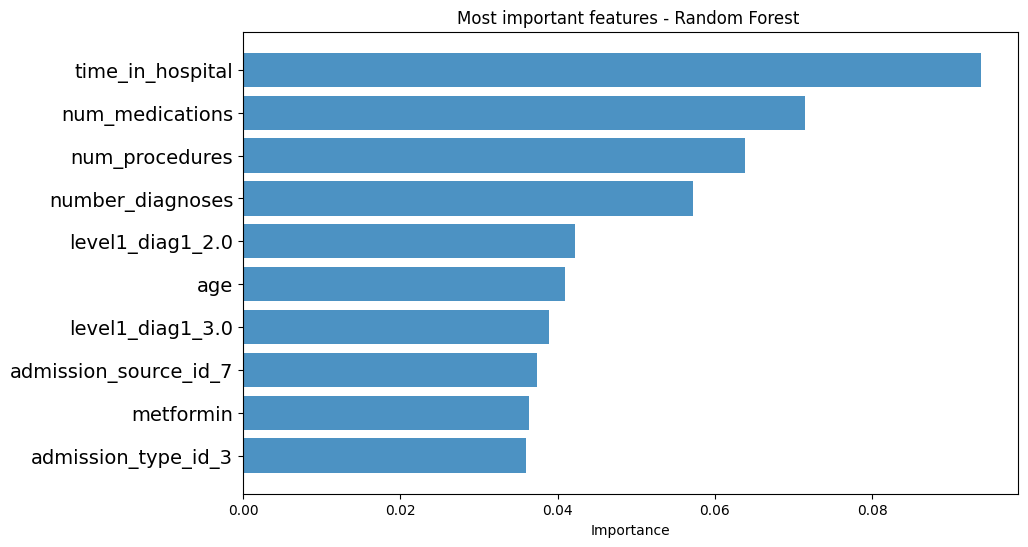

In [173]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

#CONCLUSION
 The model demonstrated good overall performance with an accuracy of 87%, indicating that it correctly predicted outcomes for 87% of instances. The precision, measuring the accuracy of positive predictions, stood at 86%, and recall, reflecting the model's ability to identify positive cases, was 88%. These results suggest that the Decision Tree Classifier is effective in making predictions on your healthcare dataset, successfully balancing correctness and sensitivity to positive cases. In essence, the Decision Tree uses a tree-like structure to navigate through different features in the data, creating decision rules that help classify instances.